In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
url = 'https://drive.google.com/uc?export=download&id=1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP'
data = pd.read_csv(url)

# Display basic information
print(data.info())
print(data.describe())

# Handle missing values
data = data.dropna()  # Or use imputation strategies if needed

# Encode categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Feature scaling (only for numerical features)
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Splitting the dataset
X = data.drop('price', axis=1)  # Replace 'price' with the target column's name
y = data['price']  # Replace 'price' with the target column's name
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

# Fit models and make predictions
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)


In [7]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate each model
results = {}
for name, preds in predictions.items():
    r2 = r2_score(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    results[name] = {'R²': r2, 'MSE': mse, 'MAE': mae}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)


                                   R²       MSE       MAE
Linear Regression            0.844116  0.193765  0.261917
Decision Tree Regressor      0.881493  0.147305  0.251717
Random Forest Regressor      0.955630  0.055153  0.166793
Gradient Boosting Regressor  0.933122  0.083129  0.200089
Support Vector Regressor     0.374270  0.777788  0.481898


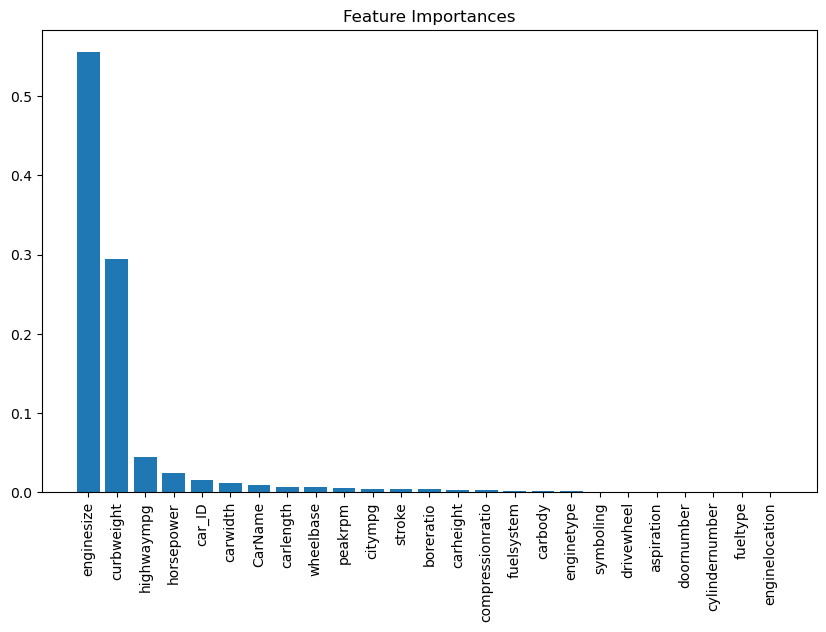

In [9]:
# Feature importance for tree-based models
import matplotlib.pyplot as plt

best_tree_model = models['Random Forest Regressor']  # Replace with the best-performing tree model
importances = best_tree_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[sorted_indices], rotation=90)
plt.title("Feature Importances")
plt.show()


In [11]:
from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for Random Forest Regressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Display best parameters and performance
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
best_preds = best_model.predict(X_test)
print("R² Score (Tuned):", r2_score(y_test, best_preds))


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
R² Score (Tuned): 0.9571566176580925
